# Feature Selection
* via eli5 permutation importance
* via correlation analysis

#### 1. Feature importances

Select our features:<br>
Via the eli5 library's permutation importance method.<br>
One benefit of viewing feature importances is that we can begin to remove less important features. By reducing the number of features in our model we reap multiple benefits:<br>
- Our models become easier to understand<br>
- We remove collinear features<br>
- We can prioritize our feature engineering and interpretation on the selected features

#### 2. Correlation Analysis
Even after our initial feature selection, we still may have highly correlated features. This can obscure our ability to identify the impact of certain features, and make it more difficult to prioritize our features to further clean up the data in these features.

- Use correlation analysis to remove highly correlated features
 1. Use "rank" scatter plots to identify highly correlated features
 2. Use spearman correlations to identify highly correlated features
 3. Use a dendrogram to identify highly correlated features
- Try removing those highly correlated features, and see if you can do so without a significant hit to your model.

#### 3. Identifying Data Leakage
Data leakage is when our model identified uses features that we would not have at the time of making a decision. Essentially, we are detecting an effect, rather than a cause of our target variable.

#### 4. Removing Time Components
Are there time components in our features that we can replace with other features?

In [1]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/mhan1/Data-Science/master/Machine%20Learning_Linear%20Regression%20project_Minyeong%20Han_Data%20Science/imputed_engineered_features.csv")
df1.drop(columns='Unnamed: 0', inplace=True)
df1.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other,normalized_losses
0,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,122.0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,122.0


In [2]:
#checking the number of rows and columns
df1.shape

(205, 49)

In [3]:
X = df1.iloc[:, :-1]
X.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other
0,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,1,0
1,3,2.0,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,1,0


In [4]:
y = df1['normalized_losses']
y.head(2)

0    122.0
1    122.0
Name: normalized_losses, dtype: float64

In [5]:
y.isnull

<bound method Series.isnull of 0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized_losses, Length: 205, dtype: float64>

## Split the data into training, test, and validation sets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
X_train[:1]

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other
28,-1,4.0,103.3,174.6,64.6,59.8,2535,4,122,3.34,...,0,1,0,0,0,0,1,0,0,0


In [8]:
X_val[:1]

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other
88,-1,4.0,96.3,172.4,65.4,51.6,2403,4,110,3.17,...,0,1,0,0,0,0,0,0,0,1


In [9]:
X_test[:1]

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other
15,0,4.0,103.5,189.0,66.9,55.7,3230,6,209,3.62,...,0,1,0,0,0,0,0,0,1,0


In [10]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(131, 48)
(41, 48)
(33, 48)


## Train the model

### I tuned three hyperparameters for the random forest regressor in the previous task:
- 1. max_features = 0.5<br>
- 2. n_estimators = 14<br>
- 3. min_samples_leaf = 4<br>

I will use this model here.

In [11]:
from sklearn.ensemble import RandomForestRegressor

rfr_tuned = RandomForestRegressor(min_samples_leaf = 4,
                                  n_estimators = 14,
                                  max_features = 0.5, random_state=1)

In [12]:
rfr_tuned.fit(X_train, y_train)
rfr_tuned.score(X_val, y_val)

0.46286045376950197

## 1. Feature importance

### the eli5 library's permutation importance method.

In [13]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfr_tuned).fit(X_val, y_val)

#### View the importances

In [14]:
eli5.explain_weights_df(perm, feature_names = X_val.columns.to_list())

,feature,weight,std
0,height,0.317620,0.099099
1,length,0.117975,0.039489
2,peak_rpm,0.096312,0.027321
3,bore,0.045541,0.023403
4,wheel-base,0.041069,0.010566
5,num_of_doors,0.034821,0.019609
6,symboling,0.033450,0.004178
7,price,0.032691,0.016282
8,make_other,0.026904,0.014827
9,make_volvo,0.026049,0.010428


In [15]:
eli5.show_weights(perm, feature_names=X_val.columns.to_list())

Weight,Feature
0.3176 ± 0.1982,height
0.1180 ± 0.0790,length
0.0963 ± 0.0546,peak_rpm
0.0455 ± 0.0468,bore
0.0411 ± 0.0211,wheel-base
0.0348 ± 0.0392,num_of_doors
0.0335 ± 0.0084,symboling
0.0327 ± 0.0326,price
0.0269 ± 0.0297,make_other
0.0260 ± 0.0209,make_volvo


### Based above, I will choose the features with weight of higher than 0.01 to remove less important features.

### Select the features from the dataframe using the SelectFromModel transformer from sklearn

In [16]:
from sklearn.feature_selection import SelectFromModel

first_selection = SelectFromModel(perm, threshold=0.01, prefit=True)
X_val_first_select = first_selection.transform(X_val)
X_train_first_select = first_selection.transform(X_train)

In [17]:
first_selection

SelectFromModel(estimator=PermutationImportance(cv='prefit',
           estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2...e=1, verbose=0, warm_start=False),
           n_iter=5, random_state=None, refit=True, scoring=None),
        max_features=None, norm_order=1, prefit=True, threshold=0.01)

In [18]:
rfr_first_select = RandomForestRegressor(min_samples_leaf = 4,
                                         n_estimators = 14,
                                         max_features = 0.5, random_state=1)

In [19]:
rfr_first_select.fit(X_train_first_select, y_train)
rfr_first_select.score(X_val_first_select, y_val)

0.5150170245039684

### Here I saw increase in performance from my model. With 48 features, the accuracy was 0.46286045376950197, and now with selected features(weight > 0.01), the accuracy is larger.

In [20]:
#determine which features were selected.
first_selection.get_support()

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
first_select_cols = X_train.columns[first_selection.get_support()]
first_select_cols

Index(['symboling', 'num_of_doors', 'wheel-base', 'length', 'width', 'height',
       'engine_size', 'bore', 'peak_rpm', 'highway_mpg', 'price', 'make_honda',
       'make_other', 'make_volvo'],
      dtype='object')

In [22]:
first_select_cols.shape

(14,)

### Round two

### I will look at the changes in feature importances by using PermutaionImportance again, with these features selected.

In [23]:
import eli5
from eli5.sklearn import PermutationImportance

second_pmi = PermutationImportance(rfr_first_select).fit(X_val_first_select, y_val)

In [24]:
eli5.explain_weights_df(second_pmi, feature_names = first_select_cols.to_list())

,feature,weight,std
0,height,0.298555,0.080403
1,symboling,0.110592,0.047010
2,length,0.094098,0.029480
3,wheel-base,0.070379,0.005953
4,peak_rpm,0.062607,0.010149
5,num_of_doors,0.054442,0.018272
6,make_honda,0.049020,0.011747
7,highway_mpg,0.037400,0.002887
8,price,0.037190,0.029108
9,width,0.012521,0.034233


In [25]:
eli5.show_weights(second_pmi, feature_names = first_select_cols.to_list())

Weight,Feature
0.2986 ± 0.1608,height
0.1106 ± 0.0940,symboling
0.0941 ± 0.0590,length
0.0704 ± 0.0119,wheel-base
0.0626 ± 0.0203,peak_rpm
0.0544 ± 0.0365,num_of_doors
0.0490 ± 0.0235,make_honda
0.0374 ± 0.0058,highway_mpg
0.0372 ± 0.0582,price
0.0125 ± 0.0685,width


### Based on above, I can see some features no longer have one percent weight cutoff.

In [26]:
from sklearn.feature_selection import SelectFromModel

second_select = SelectFromModel(second_pmi, threshold=0.01, prefit=True)
X_val_second_select = second_select.transform(X_val_first_select)
X_train_second_select = second_select.transform(X_train_first_select)

rfr_second_select = RandomForestRegressor(min_samples_leaf = 4,
                                         n_estimators = 14,
                                         max_features = 0.5, random_state=1)
rfr_second_select.fit(X_train_second_select, y_train)
rfr_second_select.score(X_val_second_select, y_val)

0.4878160293666944

### Round three

In [27]:
import eli5
from eli5.sklearn import PermutationImportance
third_pmi = PermutationImportance(rfr_second_select).fit(X_val_second_select, y_val)


third_select = SelectFromModel(third_pmi, threshold=0.01, prefit=True)
X_val_third_select = third_select.transform(X_val_second_select)
X_train_third_select = third_select.transform(X_train_second_select)

rfr_third_select = RandomForestRegressor(min_samples_leaf = 4,
                                         n_estimators = 14,
                                         max_features = 0.5, random_state=1)
rfr_third_select.fit(X_train_third_select, y_train)
rfr_third_select.score(X_val_third_select, y_val)

0.5166901930384304

In [28]:
print(first_select_cols.shape)

second_select_cols = first_select_cols[second_select.get_support()]
print(second_select_cols.shape)

third_select_cols = second_select_cols[third_select.get_support()]
third_select_cols.shape

(14,)
(11,)


(10,)

In [29]:
eli5.explain_weights_df(third_pmi, feature_names = second_select_cols.to_list())

,feature,weight,std
0,height,0.323820,0.025662
1,symboling,0.169108,0.037749
2,length,0.101951,0.035623
3,peak_rpm,0.073956,0.014344
4,highway_mpg,0.057272,0.017545
5,price,0.053908,0.036945
6,wheel-base,0.052118,0.020102
7,make_other,0.037972,0.021286
8,num_of_doors,0.023113,0.007752
9,width,0.018100,0.017768


In [30]:
eli5.show_weights(third_pmi, feature_names = second_select_cols.to_list())

Weight,Feature
0.3238 ± 0.0513,height
0.1691 ± 0.0755,symboling
0.1020 ± 0.0712,length
0.0740 ± 0.0287,peak_rpm
0.0573 ± 0.0351,highway_mpg
0.0539 ± 0.0739,price
0.0521 ± 0.0402,wheel-base
0.0380 ± 0.0426,make_other
0.0231 ± 0.0155,num_of_doors
0.0181 ± 0.0355,width


### Based on above, the "rfr_third_select" model has the highest accuracy score. I will use those features which are in "third_select_cols".

In [58]:
third_select_cols

Index(['symboling', 'num_of_doors', 'wheel-base', 'length', 'width', 'height',
       'peak_rpm', 'highway_mpg', 'price', 'make_other'],
      dtype='object')

#### selected model

In [59]:
third_select = SelectFromModel(third_pmi, threshold=0.01, prefit=True)
X_val_third_select = third_select.transform(X_val_second_select)
X_train_third_select = third_select.transform(X_train_second_select)

rfr_third_select = RandomForestRegressor(min_samples_leaf = 4,
                                         n_estimators = 14,
                                         max_features = 0.5, random_state=1)
rfr_third_select.fit(X_train_third_select, y_train)
rfr_third_select.score(X_val_third_select, y_val)

0.5166901930384304

In [60]:
X_train_third_select.shape

(131, 10)

In [61]:
X_val_third_select.shape

(33, 10)

In [62]:
y_train.shape

(131,)

In [63]:
y_val.shape

(33,)

In [64]:
selected_X_train = pd.DataFrame(X_train_third_select, columns=third_select_cols)
selected_X_train.loc[:, 'normalized_losses'] = y_train

selected_X_train.to_feather('./selected_train')

selected_X_val = pd.DataFrame(X_val_third_select, columns=third_select_cols)
selected_X_val.loc[:, 'normalized_losses'] = y_val

selected_X_val.to_feather('./selected_val')

In [65]:
selected_X_train.columns

Index(['symboling', 'num_of_doors', 'wheel-base', 'length', 'width', 'height',
       'peak_rpm', 'highway_mpg', 'price', 'make_other', 'normalized_losses'],
      dtype='object')

In [66]:
selected_X_train.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,peak_rpm,highway_mpg,price,make_other,normalized_losses
0,-1.0,4.0,103.3,174.6,64.6,59.8,5000.0,30.0,8921.0,1.0,122.0
1,0.0,4.0,95.7,169.7,63.6,59.1,4800.0,37.0,6918.0,0.0,122.0


In [67]:
selected_X_val.columns

Index(['symboling', 'num_of_doors', 'wheel-base', 'length', 'width', 'height',
       'peak_rpm', 'highway_mpg', 'price', 'make_other', 'normalized_losses'],
      dtype='object')

In [68]:
selected_X_val.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,peak_rpm,highway_mpg,price,make_other,normalized_losses
0,-1.0,4.0,96.3,172.4,65.4,51.6,5500.0,30.0,9279.0,0.0,NaN
1,1.0,2.0,94.5,165.3,63.8,54.5,5200.0,37.0,5499.0,0.0,NaN


In [69]:
selected_X_train.shape

(131, 11)

In [70]:
selected_X_val.shape

(33, 11)

### In this task, I examined the feature importances using the eli5 library PermutationImportance transformer and selected important features using sklearn's SelectFromModel transformer. I saw that with each selection of the features, the feature importances changed, as colinearity between the features is reduced. I could reduce the number of features in the model by removing unimportant features and looking at the accuracy score of the model.

## 2. Correlation analysis

Use correlation analysis to remove highly correlated features
 - 1.Use "rank" scatter plots to identify highly correlated features
 - 2.Use spearman correlations to identify highly correlated features
 - 3.Use a dendrogram to identify highly correlated features<br>
Try removing those highly correlated features, and see if you can do so without a significant hit to your model.

In [71]:
import pandas as pd

df_train = pd.read_feather('./selected_train')
selected_X_train = df_train.drop(columns = ['normalized_losses'])

df_val = pd.read_feather('./selected_val')
selected_X_val = df_val.drop(columns = ['normalized_losses'])

rfr = RandomForestRegressor(min_samples_leaf = 4,
                           n_estimators = 14,
                           max_features = 0.5, random_state=1)
rfr.fit(selected_X_train, y_train)
rfr.score(selected_X_val, y_val)

0.5166901930384304

In [72]:
df_train.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,peak_rpm,highway_mpg,price,make_other,normalized_losses
0,-1.0,4.0,103.3,174.6,64.6,59.8,5000.0,30.0,8921.0,1.0,122.0
1,0.0,4.0,95.7,169.7,63.6,59.1,4800.0,37.0,6918.0,0.0,122.0


In [73]:
selected_X_val.shape

(33, 10)

In [74]:
y_val.shape

(33,)

In [75]:
pmi = PermutationImportance(rfr).fit(selected_X_val, y_val)

In [76]:
eli5.explain_weights_df(pmi, feature_names = selected_X_train.columns.to_list())

,feature,weight,std
0,height,0.311315,0.093936
1,symboling,0.185578,0.052057
2,length,0.097705,0.025756
3,price,0.071638,0.049172
4,peak_rpm,0.058992,0.023218
5,num_of_doors,0.054197,0.015866
6,wheel-base,0.040599,0.026721
7,highway_mpg,0.008041,0.007661
8,width,0.003136,0.015769
9,make_other,0.000328,0.004709


### Removing correlated features

### "Rank" scatter plot

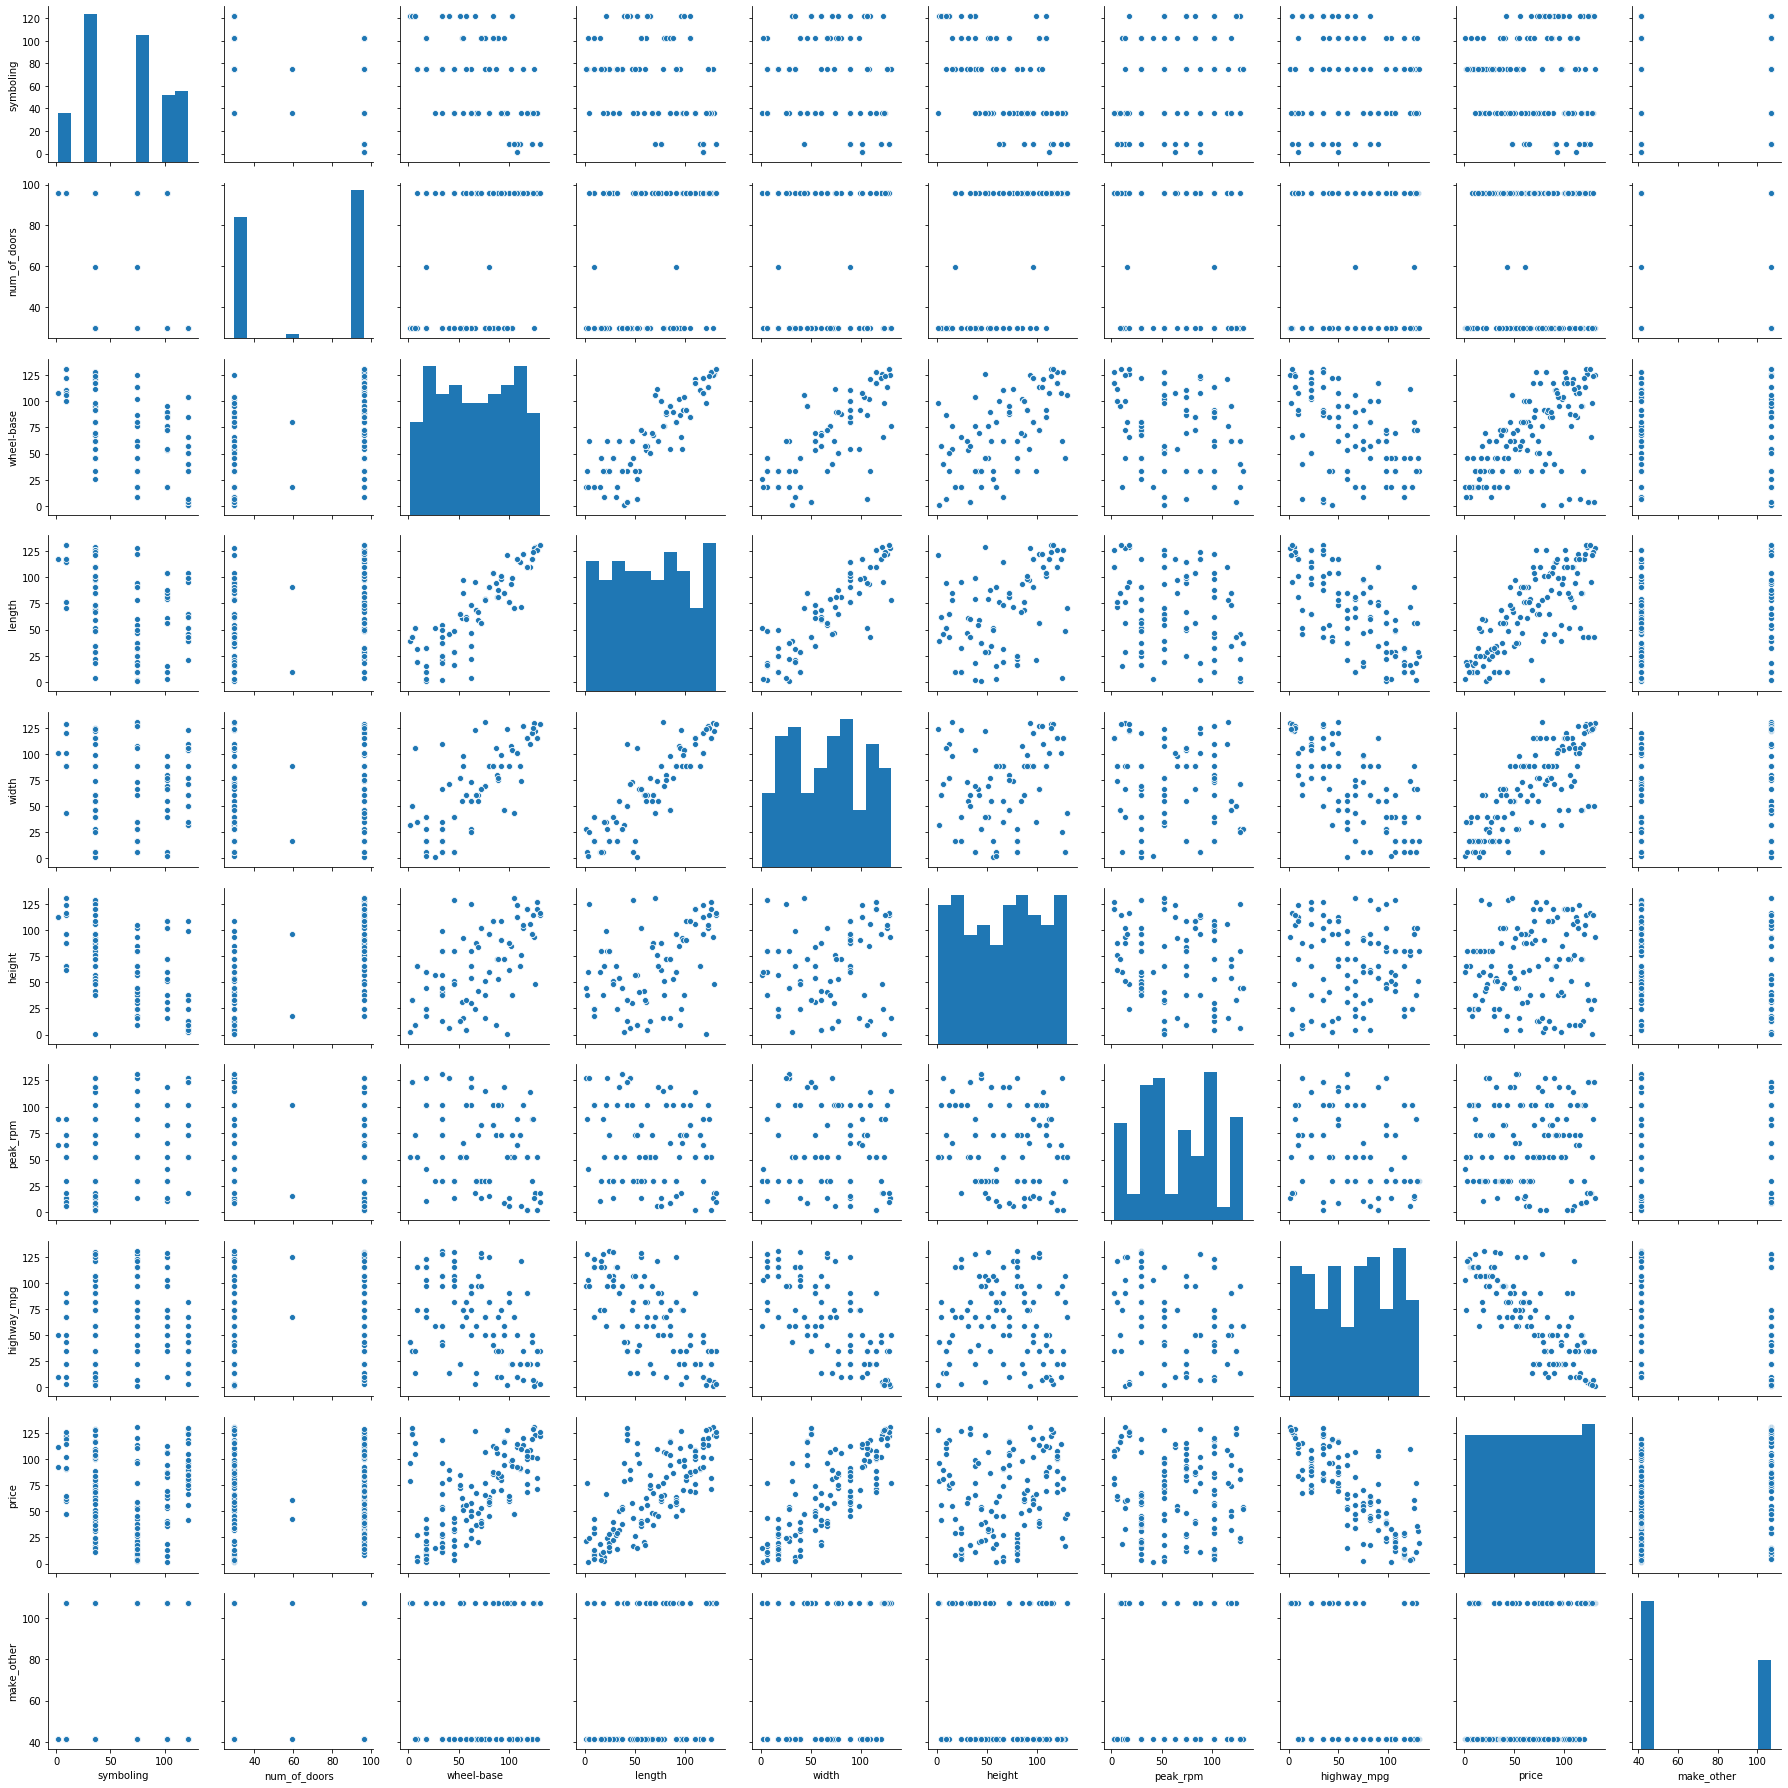

In [77]:
import seaborn as sns

#Draw scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(selected_X_train.rank())

### Spearman correlation

#### By using the spearman correlation, we can find features that are related even if not linearly related. I will find the features that have a spearman correlation above 0.6 with another feature.

In [78]:
import numpy as np
indexed_corr = (np.abs(selected_X_train.corr(method = 'spearman')) > 0.60).sum()
correlated_cols = indexed_corr[indexed_corr > 1].index
correlated_cols

Index(['symboling', 'num_of_doors', 'wheel-base', 'length', 'width', 'height',
       'highway_mpg', 'price'],
      dtype='object')

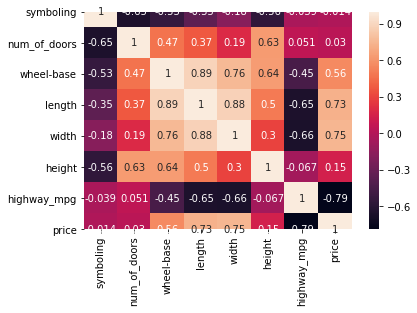

In [79]:
import seaborn as sns
df_corr = selected_X_train[correlated_cols].corr(method = 'spearman')
sns.heatmap(df_corr, annot = True)

In [80]:
(np.abs(selected_X_train.corr(method = 'spearman')) > 0.60).sum().sort_values(ascending=False)

width           5
length          5
price           4
highway_mpg     4
wheel-base      4
height          3
num_of_doors    3
symboling       2
make_other      1
peak_rpm        1
dtype: int64

### Dendrogram

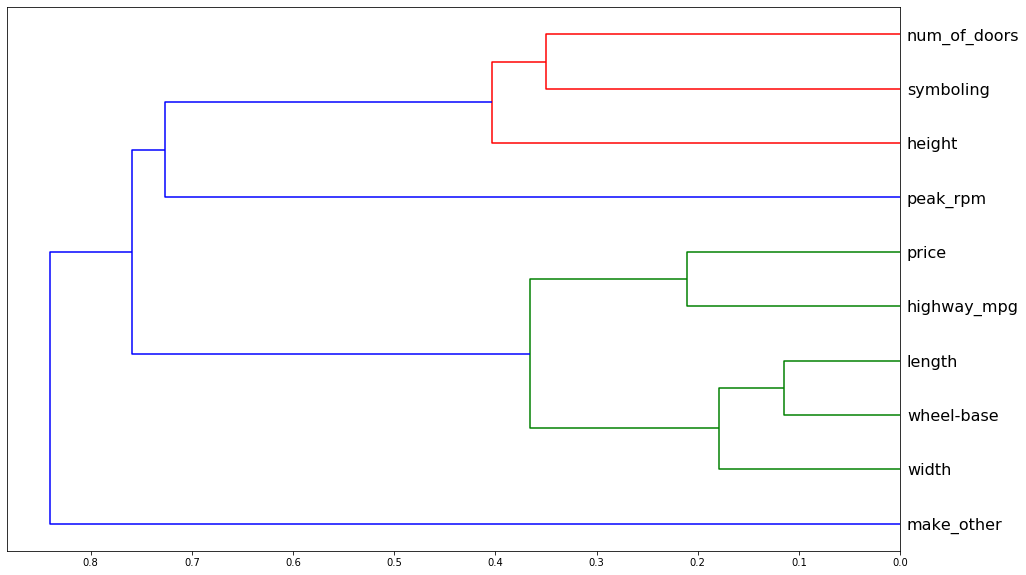

In [81]:
import numpy as np

import scipy.cluster.hierarchy as hc
corr = selected_X_train.corr(method = 'spearman')
corr_condensed = hc.distance.squareform(1 - np.abs(corr))
z = hc.linkage(corr_condensed, method = 'average')

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 10))
dendrogram = hc.dendrogram(z, labels = selected_X_train.columns,
                           orientation = 'left', leaf_font_size=16)

### Based on above, I can identify those features that are highly correlated. 
- 1. length, wheel-base: 0.89
- 2. length, width: 0.88 
- 3. price, highway_mpg: -0.79

#### 1) length, wheel-base

- remove length: 0.414866958981269
- remove wheel-base: 0.4279775294169257 
- remove length and wheel-base : 0.3903718940626494

I tried above three permutations of removing one or both of two features to see if we suffer a significant decrease from the original score of 0.5166901930384304.
I decided to keep both features, as I can see decrease from the original score.

In [85]:
drop_length_wheelb_train = selected_X_train.drop(columns = ['length', 'wheel-base'])
drop_length_wheelb_val = selected_X_val.drop(columns = ['length', 'wheel-base'])

rfr_drop_length_wheelb = RandomForestRegressor(min_samples_leaf = 4,
                                        n_estimators = 14,
                                        max_features = 0.5, random_state=1)

rfr_drop_length_wheelb.fit(drop_length_wheelb_train, y_train)
rfr_drop_length_wheelb.score(drop_length_wheelb_val, y_val)

0.3903718940626494

#### 2) length, width

- remove length: 0.414866958981269
- remove width: 0.4850046377960373 
- remove length and width : 0.41766173536778284

I tried above three permutations of removing one or both of two features to see if we suffer a significant decrease from the original score of 0.5166901930384304. I decided to keep both features, as I can see decrease from the original score.

In [89]:
drop_length_train = selected_X_train.drop(columns = ['length', 'width'])
drop_length_val = selected_X_val.drop(columns = ['length', 'width'])

rfr_drop_length = RandomForestRegressor(min_samples_leaf = 4,
                                        n_estimators = 14,
                                        max_features = 0.5, random_state=1)

rfr_drop_length.fit(drop_length_train, y_train)
rfr_drop_length.score(drop_length_val, y_val)

0.41766173536778284

#### 3) price, highway_mpg

- remove price: 0.4841863647115614
- remove highway_mpg: 0.4586301179917612
- remove price and highway_mpg: 0.4636913466962252

I tried above three permutations of removing one or both of two features to see if the model suffers a significant decrease from the original score of 0.5166901930384304. I decided to keep both features, as I can see decrease from the original score.

In [96]:
drop_price_train = selected_X_train.drop(columns = ['price', 'highway_mpg'])
drop_price_val = selected_X_val.drop(columns = ['price', 'highway_mpg'])

rfr_drop_price = RandomForestRegressor(min_samples_leaf = 4,
                                        n_estimators = 14,
                                        max_features = 0.5, random_state=1)

rfr_drop_price.fit(drop_price_train, y_train)
rfr_drop_price.score(drop_price_val, y_val)

0.4636913466962252

## Taking Stock

#### The features I still have

In [99]:
selected_X_train.shape

(131, 10)

In [100]:
selected_X_train.columns

Index(['symboling', 'num_of_doors', 'wheel-base', 'length', 'width', 'height',
       'peak_rpm', 'highway_mpg', 'price', 'make_other'],
      dtype='object')

#### I have total 10 features in my model, and each of them do not look similar to each other.

## Placing it in context

In [101]:
selected_X_train.shape

(131, 10)

In [102]:
selected_X_train.columns

Index(['symboling', 'num_of_doors', 'wheel-base', 'length', 'width', 'height',
       'peak_rpm', 'highway_mpg', 'price', 'make_other'],
      dtype='object')

In [133]:
pmi_selected = PermutationImportance(rfr).fit(selected_X_val, y_val)
eli5.explain_weights_df(pmi_selected, feature_names = selected_X_train.columns.to_list())

,feature,weight,std
0,height,0.344275,0.054477
1,symboling,0.236391,0.048814
2,price,0.129631,0.056065
3,length,0.097920,0.019837
4,peak_rpm,0.067547,0.010065
5,num_of_doors,0.049333,0.023040
6,make_other,0.047890,0.021561
7,wheel-base,0.042734,0.014936
8,width,0.017974,0.026807
9,highway_mpg,0.006485,0.003651


In [134]:
eli5.show_weights(pmi_selected, feature_names = selected_X_train.columns.to_list())

Weight,Feature
0.3443 ± 0.1090,height
0.2364 ± 0.0976,symboling
0.1296 ± 0.1121,price
0.0979 ± 0.0397,length
0.0675 ± 0.0201,peak_rpm
0.0493 ± 0.0461,num_of_doors
0.0479 ± 0.0431,make_other
0.0427 ± 0.0299,wheel-base
0.0180 ± 0.0536,width
0.0065 ± 0.0073,highway_mpg


#### symboling, num_of_doors, wheel-base, length, width, height, peak_rpm, highway_mpg, price, make_other are the features that will determine the target variable, "normalized_losses" in my model. These 10 features do not look similar to each other, and there is no data leakage(Data leakage is when our model identified uses features that we would not have at the time of making a decision. Essentially, we are detecting an effect, rather than a cause of our target variable). In this task, I used eli5 perutaion importance method, and chose features with weight over 0.01, and then performed correlation analysis to remove highly correlated features with other features, and then looked at if there is data leakage. Time components will be examined in the next task, if there is any. By doing this task, I could see a greater significance of the remaining features.

#### Saving the data for later use: Since I didn't remove any feature after I selected the third model based on the permutation importance, I am saving these as my X_train and X_val, and the original X_test, y_test, y_train, y_val will be saved respectively.

In [153]:
y_val.head()

88     137.0
89     128.0
201     95.0
192    122.0
94     128.0
Name: normalized_losses, dtype: float64

In [154]:
X_val.head()

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other
88,-1,4.0,96.3,172.4,65.4,51.6,2403,4,110,3.17,...,0,1,0,0,0,0,0,0,0,1
89,1,2.0,94.5,165.3,63.8,54.5,1889,4,97,3.15,...,0,1,0,0,0,0,1,0,0,0
201,-1,4.0,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0,1,0,0,0,0,0,0,1,0
192,0,4.0,100.4,180.2,66.9,55.1,2579,4,97,3.01,...,0,1,0,0,0,0,0,1,0,0
94,1,2.0,94.5,165.3,63.8,54.5,1951,4,97,3.15,...,0,1,0,0,0,0,1,0,0,0


In [155]:
selected_X_val.head()

,symboling,num_of_doors,wheel-base,length,width,height,peak_rpm,highway_mpg,price,make_other
0,-1.0,4.0,96.3,172.4,65.4,51.6,5500.0,30.0,9279.0,0.0
1,1.0,2.0,94.5,165.3,63.8,54.5,5200.0,37.0,5499.0,0.0
2,-1.0,4.0,109.1,188.8,68.8,55.5,5300.0,25.0,19045.0,0.0
3,0.0,4.0,100.4,180.2,66.9,55.1,4500.0,38.0,13845.0,0.0
4,1.0,2.0,94.5,165.3,63.8,54.5,5200.0,37.0,7299.0,0.0


In [158]:
y_val.reset_index(inplace=False).head()

,index,normalized_losses
0,88,137.0
1,89,128.0
2,201,95.0
3,192,122.0
4,94,128.0


In [159]:
y_val.head()

88     137.0
89     128.0
201     95.0
192    122.0
94     128.0
Name: normalized_losses, dtype: float64

In [161]:
X_test.head(2)

,symboling,num_of_doors,wheel-base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,...,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,engine_type_other,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mpfi,fuel_system_other
15,0,4.0,103.5,189.0,66.9,55.7,3230,6,209,3.62,...,0,1,0,0,0,0,0,0,1,0
9,0,2.0,99.5,178.2,67.9,52.0,3053,5,131,3.13,...,0,1,0,0,0,0,0,0,1,0


In [163]:
y_test.head(2)

15    122.0
9     122.0
Name: normalized_losses, dtype: float64

In [164]:
selected_X_train = pd.DataFrame(X_train_third_select, columns=third_select_cols)
selected_X_train.to_feather('./X_train')
y_train.reset_index(inplace=False).to_feather('./y_train')

selected_X_val = pd.DataFrame(X_val_third_select, columns=third_select_cols)
selected_X_val.to_feather('./X_val')
y_val.reset_index(inplace=False).to_feather('./y_val')

X_test.reset_index(inplace=False).to_feather('./X_test')
y_test.reset_index(inplace=False).to_feather('./y_test')